### Predict Conversion Rate
We have data about users who hit our site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site).

The project is to:
1. Predict conversion rate
2. Come up with recommendations for the product team and the marketing team to improve conversion rate

In [210]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### 1. Data overview

In [211]:
df0 = pd.read_csv(r'C:\Users\Michelle\Desktop\challenges\takehome\data_takehome\01_ConversionRate.csv')
df0.head(2)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0


In [212]:
df0.shape

(316200, 6)

In [213]:
df0.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [214]:
df0.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


#### Data overview notes
1. Overall convertion rate: around 3.23%
2. Age outliers: max 123

### 2. Remove outliers

In [215]:
df0[df0.age>=100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [216]:
# Remove age>=100
df = df0.loc[df0.age<100]
df.age.describe()

count    316198.000000
mean         30.569311
std           8.268958
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max          79.000000
Name: age, dtype: float64

### 3. Data visulization
#### 3.1 Country: customer count vs. conversion rate
1. High customer count: US, China
2. High conversion rate: Germany, UK 

#### Suggetions: 
* Adjust: China has very bad conversion rate, even though there are lots of users. We can check Chinese translation, as well as research their culture.   
* Improve: Germany and UK's conversion rates are good, although not too many customers. We can put more advertisement to attract further purchases. 

In [217]:
df[['country', 'converted']].groupby('country').agg(['count', 'mean'])

converted          
            count      mean
country                    
China       76602  0.001332
Germany     13055  0.062428
UK          48449  0.052612
US         178092  0.037801

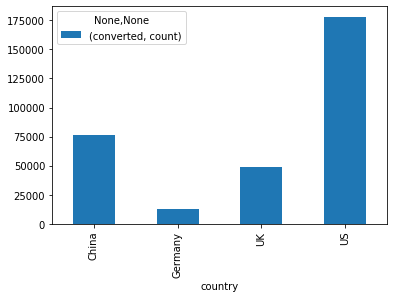

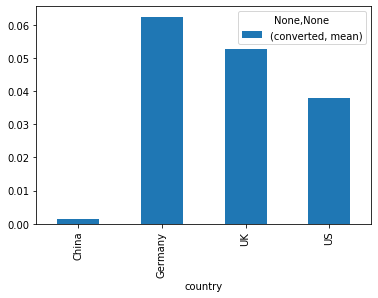

In [218]:
df[['country', 'converted']].groupby('country').agg(['count']).plot(kind='bar')
df[['country', 'converted']].groupby('country').agg(['mean']).plot(kind='bar') 

#### 3.2 Age: customer count vs. conversion rate
1. High customer count: before 50
2. High conversion rate: before 65 

#### Suggetions: 
* Most users are young people, but conversion rate decreases as age increasing. After 65, there are very few orders placed. We need to investigate them into different segments.  
* After 50, converstion rate is extremely high, although there are not many users, their demands are very straight forward. We can research senior market, design a simple and clear UI layout for a direct senior channel, offer them promotion coupons as well. 

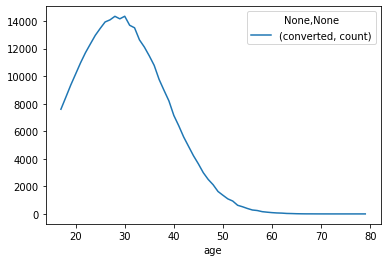

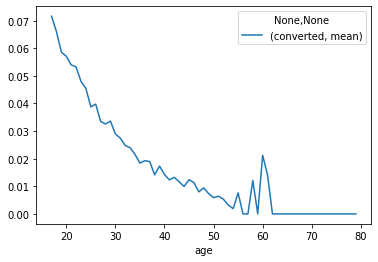

In [219]:
df[['age', 'converted']].groupby('age').agg(['count']).plot()
df[['age', 'converted']].groupby('age').agg(['mean']).plot()

#### 3.3 New_user: customer count vs. conversion rate
1. High customer count: new_user
2. High conversion rate: old_user

#### Suggetions: 
* Successfully attracted a large number of new users to our website, but could not improve their conversion rate. We can start some new users' promotion, such as 10 dollars coupon for the first purchase. If invite friends, friends can also get 10 dollars off. 
* Since old users' conversion rate is high, we can do lightning deals once a week on certain items to increase all the other product sales.  

In [220]:
df[['new_user', 'converted']].groupby('new_user').agg(['count', 'mean'])

converted          
             count      mean
new_user                    
0            99454  0.071983
1           216744  0.014021

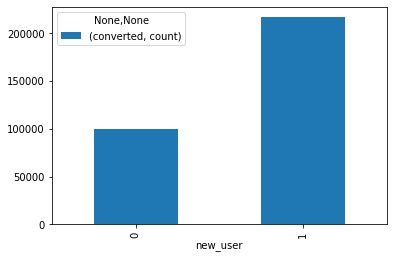

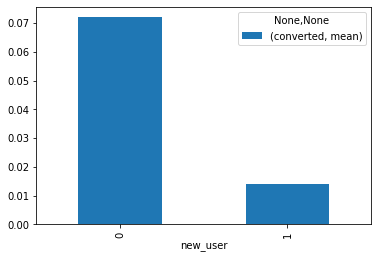

In [221]:
df[['new_user', 'converted']].groupby('new_user').agg(['count']).plot(kind='bar')
df[['new_user', 'converted']].groupby('new_user').agg(['mean']).plot(kind='bar') 

#### 3.4 Total_pages_visited: customer count vs. conversion rate
1. High customer count: less than 15 pages
2. High conversion rate: more than 15 pages

#### Suggetions: 
* This is normal, more pages viewed and longer time stayed would result in higher conversion rate. If we find some users browse a lot without placing orders, we can send them an email as reminder.  

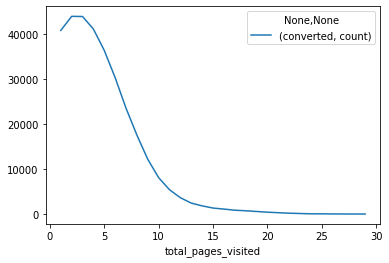

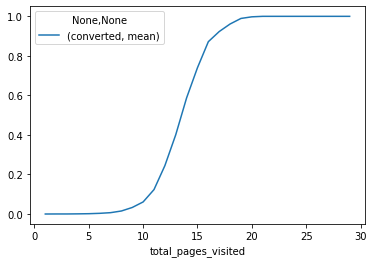

In [222]:
df[['total_pages_visited', 'converted']].groupby('total_pages_visited').agg(['count']).plot()
df[['total_pages_visited', 'converted']].groupby('total_pages_visited').agg(['mean']).plot()

#### 3.5 Source: customer count vs. conversion rate
1. High customer count: SEO, Ads
2. High conversion rate: SEO, Ads

#### Suggetions: 
* Our investment on SEO and Ads work good, brought us most of customers and conversion rate, as well as Ads income.  

In [223]:
df[['source', 'converted']].groupby('source').agg(['count', 'mean'])

converted          
           count      mean
source                    
Ads        88739  0.034472
Direct     72420  0.028169
Seo       155039  0.032888

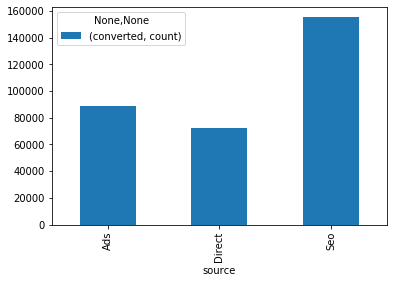

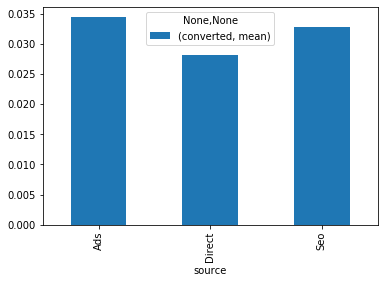

In [224]:
df[['source', 'converted']].groupby('source').agg(['count']).plot(kind='bar')
df[['source', 'converted']].groupby('source').agg(['mean']).plot(kind='bar') 

### 4. Data processing
#### 4.1 Convert strings to numbers

In [225]:
df.country.unique()

array(['UK', 'US', 'China', 'Germany'], dtype=object)

In [226]:
df.source.unique()

array(['Ads', 'Seo', 'Direct'], dtype=object)

In [227]:
le = LabelEncoder()
df1 = df.iloc[:, 0:]
df1.country = le.fit_transform(df1.country)
df1.source = le.fit_transform(df1.source)
df1.head(2)

,country,age,new_user,source,total_pages_visited,converted
0,2,25,1,0,1,0
1,3,23,1,2,5,0


In [228]:
df1.country.unique()

array([2, 3, 0, 1])

In [229]:
df1.source.unique()

array([0, 2, 1])

#### 4.2 Split data

In [230]:
X = df1.iloc[:, :5]
y = df1.iloc[:, 5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#### 4.3 Build model - Decision Tree

In [231]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [232]:
dt.score(X_test, y_test)

0.9839869281045751

In [233]:
dt.predict([[2,25,1,0,1]])

array([0], dtype=int64)

In [234]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91789
           1       0.82      0.64      0.72      3071

    accuracy                           0.98     94860
   macro avg       0.91      0.82      0.86     94860
weighted avg       0.98      0.98      0.98     94860



#### 4.4 Build model - Logistic Regression

In [235]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [236]:
lr.score(X_test, y_test)

0.9854522454142948

In [237]:
lr.predict([[0,24,0,2,18]])

array([1], dtype=int64)

In [238]:
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91789
           1       0.85      0.67      0.75      3071

    accuracy                           0.99     94860
   macro avg       0.92      0.83      0.87     94860
weighted avg       0.98      0.99      0.98     94860



* Both decision tree model and logistic regression model produce an accuracy over 98% on test dataset, they are pretty suitable to predict the conversion rate here.